In [33]:
import pandas as pd
import json
import numpy as np
from datetime import datetime
from plotly import graph_objects as go

In [20]:
with open("./contributions.json") as f:
    data = json.load(f)

rows = []
for day in data['days']:
    rows.append({
        'date': datetime(day['date']['year'], day['date']['month'], day['date']['day']),
        'count': day['count'],
        'week': day['week'],
        'weekday': day['weekday']
    })
df = pd.DataFrame(data=rows)


<Axes: xlabel='date'>

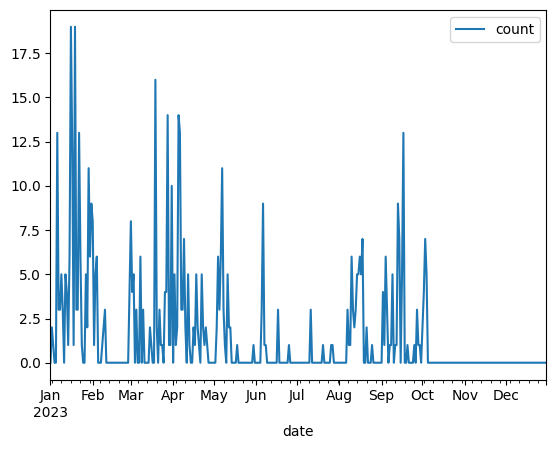

In [21]:
df.plot(x='date', y="count")

In [22]:
df

,date,count,week,weekday
0,2023-01-01,0,0,0
1,2023-01-02,2,0,1
2,2023-01-03,1,0,2
3,2023-01-04,0,0,3
4,2023-01-05,0,0,4
...,...,...,...,...
360,2023-12-27,0,51,3
361,2023-12-28,0,51,4
362,2023-12-29,0,51,5
363,2023-12-30,0,51,6


In [34]:
# grid = []
# first_weekday = df.iloc[0]['weekday']
# grid.append(list(range(0, first_weekday)))

# for idx, row in df.iterrows():
group_by_week = df.groupby("week")
dfs = {key: group for key, group in group_by_week}
dfs[0]
rows = []
for idx, (weekday, week_df) in enumerate(dfs.items()):
    if idx == 0:
        rows.append([0 for _ in range(7 - len(week_df))] + week_df['count'].to_list())
    elif idx == len(dfs) - 1:
        rows.append(week_df['count'].to_list() + [0 for _ in range(7 - len(week_df))])
    else:
        rows.append(week_df['count'].to_list())
rows = np.array(rows)

In [46]:
fig = go.Figure()
# fig.update_layout(width=len(rows) * 100)
fig.add_surface(z=rows)

In [50]:
for idx, row in df.iterrows():
    print(f"{row['date']}: {row['count']}")

2023-01-01 00:00:00: 0
2023-01-02 00:00:00: 2
2023-01-03 00:00:00: 1
2023-01-04 00:00:00: 0
2023-01-05 00:00:00: 0
2023-01-06 00:00:00: 13
2023-01-07 00:00:00: 3
2023-01-08 00:00:00: 3
2023-01-09 00:00:00: 5
2023-01-10 00:00:00: 3
2023-01-11 00:00:00: 0
2023-01-12 00:00:00: 5
2023-01-13 00:00:00: 4
2023-01-14 00:00:00: 1
2023-01-15 00:00:00: 6
2023-01-16 00:00:00: 19
2023-01-17 00:00:00: 12
2023-01-18 00:00:00: 1
2023-01-19 00:00:00: 19
2023-01-20 00:00:00: 3
2023-01-21 00:00:00: 3
2023-01-22 00:00:00: 13
2023-01-23 00:00:00: 6
2023-01-24 00:00:00: 1
2023-01-25 00:00:00: 0
2023-01-26 00:00:00: 0
2023-01-27 00:00:00: 5
2023-01-28 00:00:00: 2
2023-01-29 00:00:00: 11
2023-01-30 00:00:00: 6
2023-01-31 00:00:00: 9
2023-02-01 00:00:00: 8
2023-02-02 00:00:00: 1
2023-02-03 00:00:00: 5
2023-02-04 00:00:00: 6
2023-02-05 00:00:00: 0
2023-02-06 00:00:00: 0
2023-02-07 00:00:00: 0
2023-02-08 00:00:00: 1
2023-02-09 00:00:00: 2
2023-02-10 00:00:00: 3
2023-02-11 00:00:00: 0
2023-02-12 00:00:00: 0
2023-